In [1]:
import pandas as pd
import numpy as np
import random
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
restaurant_data = pd.read_csv('/Users/Vinod/Documents/Zomato_Datasets/pune_zomato_restaurants.csv')
restaurant_data.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)
restaurant_data['rest_name'] = restaurant_data['rest_name'].str.strip()
restaurant_data.head()

,address,book_table,cost_for_two,cuisines,dish_liked,listed_in,locality,online_order,rate,rest_name,rest_type,url,votes
0,"Shop 206, 2nd Floor, White Square Building, O...",True,"1,400","['Continental', 'North Indian', 'Chinese']","Paan Ice Cream,Fish,Sea Food,Crispy Corn,Mockt...",Hinjawadi,"White Square, Hinjawadi",NaN,4.9 ...,AB's - Absolute Barbecues,['Casual Dining'],https://www.zomato.com/pune/abs-absolute-barbe...,7172.0
1,"Near Manas Lake, Bhugaon, Pune",True,"1,500","['North Indian', 'Continental', 'Chinese']","Cocktails,Mocktails,Paneer Tikka,Crispy Chicke...",Bhugaon,Bhugaon,NaN,4.5 ...,Cafe Co2 Resto Lounge,"['Lounge', 'Casual Dining']",https://www.zomato.com/pune/cafe-co2-resto-lou...,2591.0
2,"SR 359/360, Rajiv Gandhi Infotech Park, Oppos...",NaN,"1,500","['North Indian', 'Chinese']",NaN,NaN,"Rajiv Gandhi IT Park, Hinjewadi",NaN,3.9 ...,Ostro Multi Cuisine Restaurant,['Casual Dining'],https://www.zomato.com/pune/ostro-multi-cuisin...,179.0
3,"Survey 44/7, Opposite Old Jaka Naka, Bavdhan ...",NaN,"1,500","['North Indian', 'Mughlai', 'Biryani']",NaN,NaN,Bavdhan,NaN,4.6 ...,Planet 9,"['Bar', 'Casual Dining']",https://www.zomato.com/pune/planet-9-bavdhan,407.0
4,"CTS 1183, Unit 101, 1st Floor, Mezzanine Floo...",NaN,"1,500","['North Indian', 'Chinese', 'Biryani', 'Americ...","Pizza,Cocktails,Momos,Long Island Iced Tea,Bir...",Shivaji Nagar,Shivaji Nagar,True,4.5 ...,FC Road Social,"['Bar', 'Casual Dining']",https://www.zomato.com/pune/fc-road-social-shi...,2165.0


In [3]:
restaurant_data.describe()

,votes
count,7439.000000
mean,153.572926
std,409.093985
min,3.000000
25%,11.000000
50%,32.000000
75%,109.000000
max,7172.000000


In [4]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       11600 non-null  object 
 1   book_table    459 non-null    object 
 2   cost_for_two  11600 non-null  object 
 3   cuisines      11600 non-null  object 
 4   dish_liked    2522 non-null   object 
 5   listed_in     11426 non-null  object 
 6   locality      11600 non-null  object 
 7   online_order  5589 non-null   object 
 8   rate          11533 non-null  object 
 9   rest_name     11600 non-null  object 
 10  rest_type     9547 non-null   object 
 11  url           11600 non-null  object 
 12  votes         7439 non-null   float64
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [5]:
restaurant_data.isna().sum()

address             0
book_table      11141
cost_for_two        0
cuisines            0
dish_liked       9078
listed_in         174
locality            0
online_order     6011
rate               67
rest_name           0
rest_type        2053
url                 0
votes            4161
dtype: int64

In [6]:
restaurant_data.drop(['address','listed_in','url'], axis=1, inplace=True)

In [7]:
restaurant_data.columns

Index(['book_table', 'cost_for_two', 'cuisines', 'dish_liked', 'locality',
       'online_order', 'rate', 'rest_name', 'rest_type', 'votes'],
      dtype='object')

In [8]:
restaurant_data['book_table'] = restaurant_data['book_table'].replace(np.nan, False)
restaurant_data['online_order'] = restaurant_data['online_order'].replace(np.nan, False)
restaurant_data['book_table'] = restaurant_data['book_table'].replace(True,'Yes')
restaurant_data['online_order'] = restaurant_data['online_order'].replace(True,'Yes')
restaurant_data['book_table'] = restaurant_data['book_table'].replace(False,'No')
restaurant_data['online_order'] = restaurant_data['online_order'].replace(False,'No')
restaurant_data.isna().sum()
restaurant_data.head()

,book_table,cost_for_two,cuisines,dish_liked,locality,online_order,rate,rest_name,rest_type,votes
0,Yes,"1,400","['Continental', 'North Indian', 'Chinese']","Paan Ice Cream,Fish,Sea Food,Crispy Corn,Mockt...","White Square, Hinjawadi",No,4.9 ...,AB's - Absolute Barbecues,['Casual Dining'],7172.0
1,Yes,"1,500","['North Indian', 'Continental', 'Chinese']","Cocktails,Mocktails,Paneer Tikka,Crispy Chicke...",Bhugaon,No,4.5 ...,Cafe Co2 Resto Lounge,"['Lounge', 'Casual Dining']",2591.0
2,No,"1,500","['North Indian', 'Chinese']",NaN,"Rajiv Gandhi IT Park, Hinjewadi",No,3.9 ...,Ostro Multi Cuisine Restaurant,['Casual Dining'],179.0
3,No,"1,500","['North Indian', 'Mughlai', 'Biryani']",NaN,Bavdhan,No,4.6 ...,Planet 9,"['Bar', 'Casual Dining']",407.0
4,No,"1,500","['North Indian', 'Chinese', 'Biryani', 'Americ...","Pizza,Cocktails,Momos,Long Island Iced Tea,Bir...",Shivaji Nagar,Yes,4.5 ...,FC Road Social,"['Bar', 'Casual Dining']",2165.0


# Data visualization

# Outliers

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

We will find out outliers from cost_for_two, rate and votes as they have numeric values and we have drawn some observations from the same.

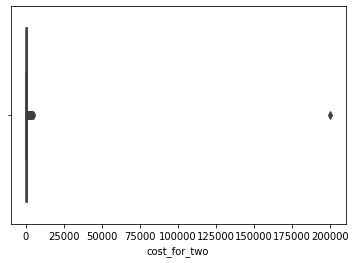

In [10]:
restaurant_data["cost_for_two"] = restaurant_data['cost_for_two'].str.replace(',', '')
restaurant_data["cost_for_two"] = pd.to_numeric(restaurant_data['cost_for_two'])
sns.boxplot(x=restaurant_data['cost_for_two'])

This shows cost_for_two has some outliers. All values are less than 25000. Lets remove all colums those have cost_for_two greater than 25K.

In [11]:
restaurant_data = restaurant_data[restaurant_data.cost_for_two < 25000]

In [12]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11599
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   book_table    11599 non-null  object 
 1   cost_for_two  11599 non-null  int64  
 2   cuisines      11599 non-null  object 
 3   dish_liked    2522 non-null   object 
 4   locality      11599 non-null  object 
 5   online_order  11599 non-null  object 
 6   rate          11532 non-null  object 
 7   rest_name     11599 non-null  object 
 8   rest_type     9546 non-null   object 
 9   votes         7438 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 996.8+ KB


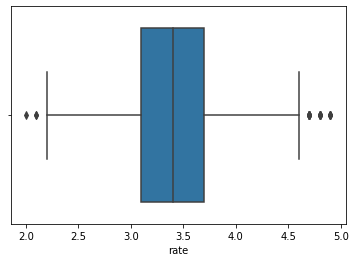

In [13]:
restaurant_data['rate'] = restaurant_data['rate'].str.strip()
restaurant_data['rate'] = restaurant_data['rate'].replace('NEW',np.NaN)
restaurant_data['rate'] = restaurant_data['rate'].replace('-',np.NaN)
restaurant_data['rate'] = pd.to_numeric(restaurant_data["rate"])
sns.boxplot(x=restaurant_data['rate'])

Rating do'nt have outliers as values are between 2-5.

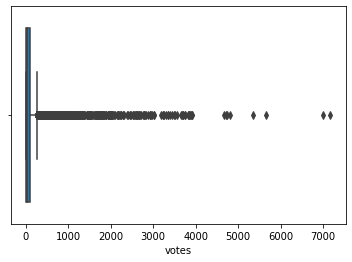

In [14]:
sns.boxplot(x=restaurant_data['votes'])

This looks good.

# Table Booking

No     11140
Yes      459
Name: book_table, dtype: int64


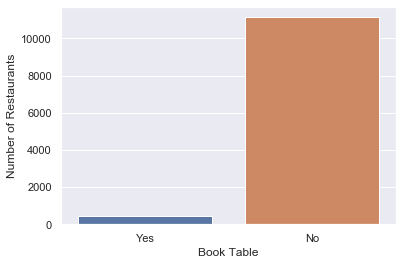

In [15]:
sns.set(style="darkgrid")
ax = sns.countplot(restaurant_data['book_table'])
ax.set(xlabel='Book Table',ylabel='Number of Restaurants')
table_booking_count = restaurant_data['book_table'].value_counts()
print(table_booking_count)

Observation:- Only 459 restaurants provide online table booking.

# Online Order

No     6011
Yes    5588
Name: online_order, dtype: int64


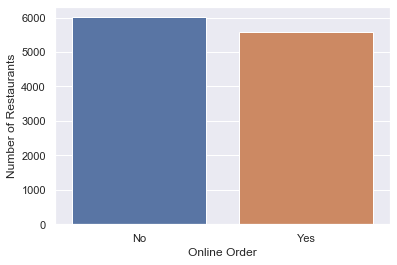

In [16]:
ax = sns.countplot(restaurant_data['online_order'])
ax.set(xlabel='Online Order', ylabel='Number of Restaurants')
online_order = restaurant_data['online_order'].value_counts()
print(online_order)

Observation:- You can order food online from 5588 restaurants.

# Restaurant Franchises

Text(0, 0.5, 'Number of Restaurants')

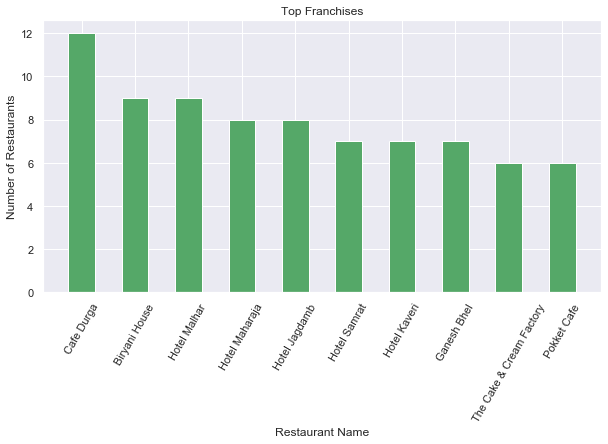

In [17]:
restaurants = restaurant_data.rest_name.value_counts()[:10]
names = restaurants.index
values = restaurants.values
plt.figure(figsize = (10,5))
plt.xticks(rotation=60)
plt.bar(names, values,color='g',width=.5)
plt.title('Top Franchises')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Restaurants')

# Number of restaurants across city

206


Text(0, 0.5, 'Number of Restautants')

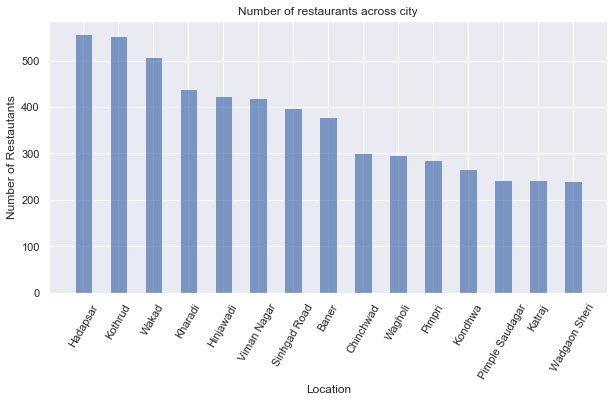

In [18]:
locations = restaurant_data.locality.value_counts()[:15]
print(restaurant_data['locality'].nunique())
places = locations.index
values = locations.values
plt.figure(figsize = (10,5))
plt.xticks(rotation=60)
plt.bar(places, values, color='b',alpha=0.7,width=0.5)
plt.title('Number of restaurants across city')
plt.xlabel('Location')
plt.ylabel('Number of Restautants')

# Restaurant Types

In [19]:
rest_data = restaurant_data.rest_type.dropna()
d = []
for i in rest_data:
    s = i[1:-1].strip().split(',')
    for j in s:
        d.append(j.strip()[1:-1])

Quick Bites       5239
Casual Dining     2723
Bar                550
Café               375
Bakery             354
Dessert Parlor     341
Food Court         155
Beverage Shop      130
Sweet Shop         115
Lounge              89
dtype: int64


Text(0, 0.5, 'No of restaurants')

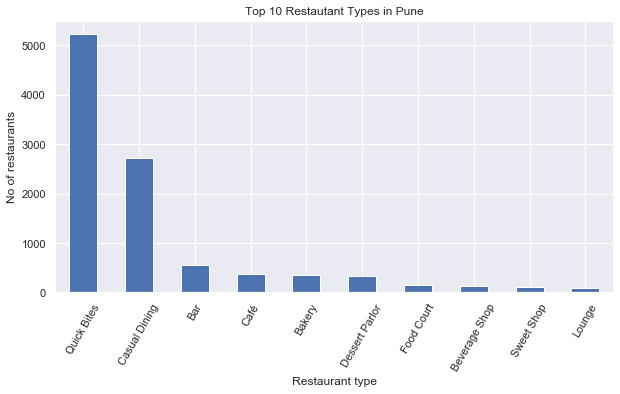

In [20]:
plt.figure(figsize=(10,5)) 
series = pd.Series(d).value_counts()[:10]
print(series)
series.plot(kind='bar',color= 'b',width=.5)
plt.xticks(rotation=60)
plt.title('Top 10 Restautant Types in Pune')
plt.xlabel('Restaurant type')
plt.ylabel('No of restaurants')

# Cuisines

North Indian     5559
Chinese          4021
Fast Food        2819
Maharashtrian    1331
Street Food      1157
South Indian     1136
Beverages        1099
Biryani          1036
Mughlai           679
Desserts          639
dtype: int64


Text(0, 0.5, 'No of restaurants')

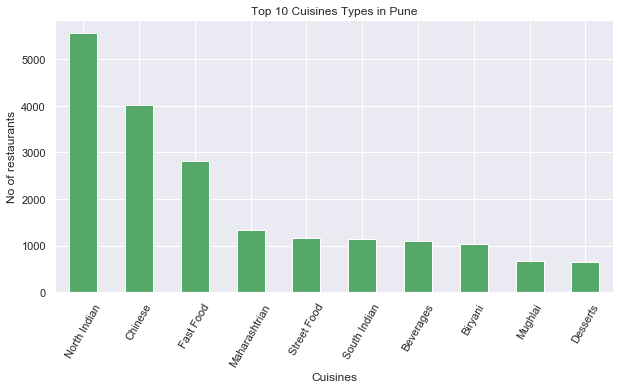

In [21]:
cuisines_data = restaurant_data.cuisines.dropna()
d = []
for i in cuisines_data:
    s = i[1:-1].strip().split(',')
    for j in s:
        d.append(j.strip()[1:-1])

plt.figure(figsize=(10,5)) 
series = pd.Series(d).value_counts()[:10]
print(series)
series.plot(kind='bar',color= 'g',width=.5)
plt.xticks(rotation=60)
plt.title('Top 10 Cuisines Types in Pune')
plt.xlabel('Cuisines')
plt.ylabel('No of restaurants')

# Famous Pune Dishes

In [22]:
dish_liked_data = restaurant_data.dish_liked.dropna()
d = []
for i in dish_liked_data:
    k = i.strip()
    if(k != ""):
        s = i.strip().split(',')
        for j in s:
            d.append(j.strip())


Pasta               299
Pizza               295
Biryani             256
Butter Chicken      236
Sandwich            234
Tandoori Chicken    228
Cocktails           221
Burgers             210
Mocktails           201
Salad               187
Pav Bhaji           177
Chicken Biryani     161
Coffee              160
Thali               154
Paratha             146
dtype: int64


Text(0, 0.5, 'No of restaurants')

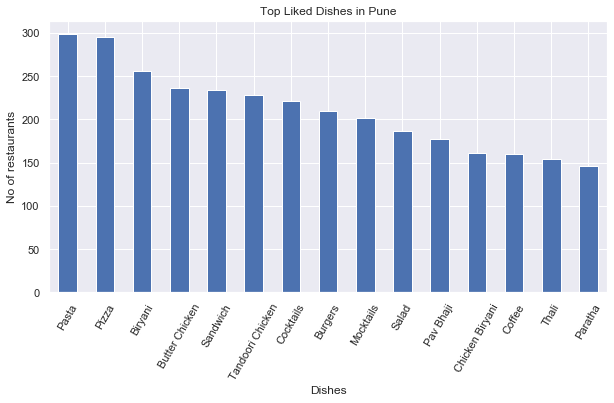

In [23]:
plt.figure(figsize=(10,5)) 
series = pd.Series(d).value_counts()[:15]
print(series)
series.plot(kind='bar',color= 'b',width=.5)
plt.xticks(rotation=60)
plt.title('Top Liked Dishes in Pune')
plt.xlabel('Dishes')
plt.ylabel('No of restaurants')

# Average cost for two

In [24]:
average_cost = restaurant_data['cost_for_two'].mean()
print("Average cost for two: {}".format(average_cost))

Average cost for two: 464.24381412190706


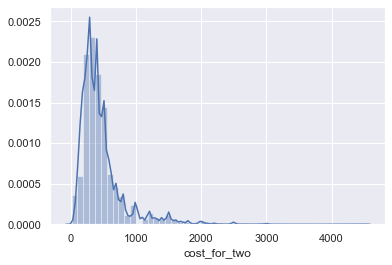

In [25]:
plt.xlabel('cost_for_two')
sns.distplot(restaurant_data['cost_for_two'],color='b')

300    1771
400    1512
200    1289
500    1281
250     898
600     644
350     630
150     618
450     408
100     373
Name: cost_for_two, dtype: int64


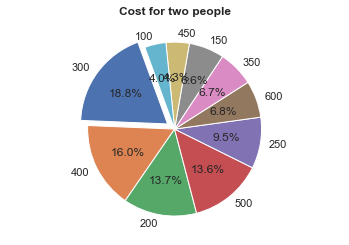

In [26]:
cost_for_two = pd.Series(restaurant_data["cost_for_two"].value_counts())[:10]
print(cost_for_two)
indices = cost_for_two.index
values = cost_for_two.values
explode =(0.1,0,0,0,0,0,0,0,0,0)
plt.axis('equal')
plt.title("Cost for two people", weight = 'bold')
plt.pie(values, explode = explode,labels= indices, startangle=110, autopct='%.1f%%') 
plt.show()

# Rating

In [27]:
average_rating = restaurant_data['rate'].mean()
print("Average rating: {}".format(average_rating))

Average rating: 3.444173260024132


In [28]:
print(restaurant_data['rate'].value_counts())

3.3    727
3.4    676
3.5    669
3.2    663
3.1    603
3.6    596
3.7    528
3.0    471
3.8    440
3.9    385
2.9    380
4.0    265
2.8    204
4.1    171
4.2    156
4.3    103
2.7     99
4.4     78
2.6     57
4.5     46
2.5     33
4.6     31
2.4     20
2.3     13
2.2     12
4.7     12
4.8      9
4.9      7
2.1      2
2.0      1
Name: rate, dtype: int64


In [29]:
restaurant_data.dropna(subset=['rate'], how='all', inplace=True)

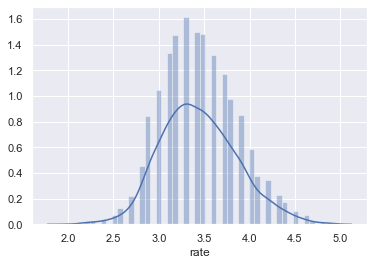

In [30]:
plt.xlabel('rate')
sns.distplot(restaurant_data['rate'],color='b')

In [31]:
restaurant_data = pd.read_csv('/Users/Vinod/Documents/Zomato_Datasets/pune_zomato_restaurants.csv')

In [32]:
restaurant_data.drop(['Unnamed: 0','Unnamed: 0.1','address','dish_liked','listed_in','rest_name','url'], axis=1, inplace=True)
restaurant_data.head()

,book_table,cost_for_two,cuisines,locality,online_order,rate,rest_type,votes
0,True,"1,400","['Continental', 'North Indian', 'Chinese']","White Square, Hinjawadi",NaN,4.9 ...,['Casual Dining'],7172.0
1,True,"1,500","['North Indian', 'Continental', 'Chinese']",Bhugaon,NaN,4.5 ...,"['Lounge', 'Casual Dining']",2591.0
2,NaN,"1,500","['North Indian', 'Chinese']","Rajiv Gandhi IT Park, Hinjewadi",NaN,3.9 ...,['Casual Dining'],179.0
3,NaN,"1,500","['North Indian', 'Mughlai', 'Biryani']",Bavdhan,NaN,4.6 ...,"['Bar', 'Casual Dining']",407.0
4,NaN,"1,500","['North Indian', 'Chinese', 'Biryani', 'Americ...",Shivaji Nagar,True,4.5 ...,"['Bar', 'Casual Dining']",2165.0


In [33]:
restaurant_data['rest_type']= restaurant_data['rest_type'].fillna('["Quick Bites","Casual Dining"]')
restaurant_data.isna().sum()

book_table      11141
cost_for_two        0
cuisines            0
locality            0
online_order     6011
rate               67
rest_type           0
votes            4161
dtype: int64

In [34]:
#this function separates strings separated by comma to list.
def organise(data,is_nested_data):
    data_to_be_returned = []
    if is_nested_data:
        for i in data:
            indi_list = []
            for j in i.upper()[1:-1].split(','):
                indi_list.append(j.strip()[1:-1])
            indi_list.sort()
            data_to_be_returned.append(indi_list)
    else:
        for i in data:
            data_to_be_returned.append(i.upper().strip())
    return data_to_be_returned

In [35]:
restaurant_data['cuisines'] = organise(restaurant_data['cuisines'],True)
restaurant_data['rest_type'] = organise(restaurant_data['rest_type'], True)
restaurant_data['locality'] = organise(restaurant_data['locality'], False)
restaurant_data.head()

,book_table,cost_for_two,cuisines,locality,online_order,rate,rest_type,votes
0,True,"1,400","[CHINESE, CONTINENTAL, NORTH INDIAN]","WHITE SQUARE, HINJAWADI",NaN,4.9 ...,[CASUAL DINING],7172.0
1,True,"1,500","[CHINESE, CONTINENTAL, NORTH INDIAN]",BHUGAON,NaN,4.5 ...,"[CASUAL DINING, LOUNGE]",2591.0
2,NaN,"1,500","[CHINESE, NORTH INDIAN]","RAJIV GANDHI IT PARK, HINJEWADI",NaN,3.9 ...,[CASUAL DINING],179.0
3,NaN,"1,500","[BIRYANI, MUGHLAI, NORTH INDIAN]",BAVDHAN,NaN,4.6 ...,"[BAR, CASUAL DINING]",407.0
4,NaN,"1,500","[AMERICAN, BIRYANI, CHINESE, CONTINENTAL, NORT...",SHIVAJI NAGAR,True,4.5 ...,"[BAR, CASUAL DINING]",2165.0


In [36]:
#Convert book_table and online_order data to 1(True) and 0(False)
restaurant_data['book_table'] = restaurant_data['book_table'].fillna('False')
restaurant_data['online_order'] = restaurant_data['online_order'].fillna('False')
restaurant_data['book_table'] = restaurant_data['book_table'].replace('False', 0)
restaurant_data['online_order'] = restaurant_data['online_order'].replace('False', 0)
restaurant_data['book_table'] = restaurant_data['book_table'].replace('True', 1)
restaurant_data['online_order'] = restaurant_data['online_order'].replace('True', 1)

In [37]:
restaurant_data['locality'] = restaurant_data['locality'].str.replace(',' , ' ')
restaurant_data['locality'] = restaurant_data['locality'].str.strip()

In [38]:
#Some values in rate column are 'NEW' and '-' convert them to nan.
restaurant_data['rate'] = restaurant_data['rate'].str.strip()
restaurant_data['rate'] = restaurant_data['rate'].replace('NEW',np.NaN)
restaurant_data['rate'] = restaurant_data['rate'].replace('-',np.NaN)

In [39]:
#fill nan with 0.0 so we can replace with best imputation method
restaurant_data['rate'] = restaurant_data['rate'].fillna(0.0)
restaurant_data['votes'] = restaurant_data['votes'].fillna(0.0)

In [40]:
#convert votes and rate to numeric(float) and fill 0 with mean value
restaurant_data.rate = restaurant_data['rate'].apply(pd.to_numeric)
restaurant_data.votes = restaurant_data['votes'].apply(pd.to_numeric)
restaurant_data['rate'] = restaurant_data['rate'].replace(0.0,restaurant_data['rate'].mean())
restaurant_data['votes'] = restaurant_data['votes'].replace(0.0,restaurant_data['votes'].mean())

In [41]:
restaurant_data["cost_for_two"] = restaurant_data["cost_for_two"].str.replace(',' , '') 
restaurant_data["cost_for_two"] = restaurant_data["cost_for_two"].astype('float')
restaurant_data["rate"] = restaurant_data["rate"].astype('float')

In [42]:
restaurant_data = restaurant_data[restaurant_data.cost_for_two < 25000]

In [43]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [44]:
#Convert categorical data.
onehot_cuisines = pd.DataFrame(mlb.fit_transform(restaurant_data['cuisines']),columns=mlb.classes_)
onehot_rest_type = pd.DataFrame(mlb.fit_transform(restaurant_data['rest_type']),columns=mlb.classes_)
one_hot_locality = pd.get_dummies(restaurant_data['locality'])

In [45]:
restaurant_data.reset_index(drop=True, inplace=True)
onehot_cuisines.reset_index(drop=True, inplace=True)
onehot_rest_type.reset_index(drop=True, inplace=True)
one_hot_locality.reset_index(drop=True, inplace=True)
ready_to_use_data = pd.concat([restaurant_data,onehot_cuisines,onehot_rest_type,one_hot_locality],axis=1)

In [46]:
#As we have converted categorical data to one-hot encoding this columns are not required anymore.
del ready_to_use_data['cuisines']
del ready_to_use_data['locality']
del ready_to_use_data['rest_type']

In [47]:
x = ready_to_use_data.drop(['rate'],axis=1)
y = ready_to_use_data['rate']

In [48]:
#import sklearn and split data to train and test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [49]:
#I found RandomForestRegressor performs best in this case
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)*100

88.04161060171104

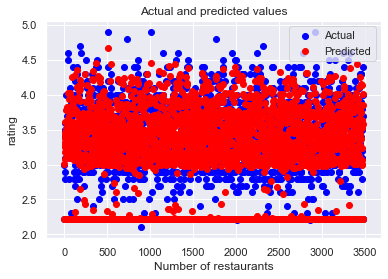

In [50]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual',)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted')

plt.title('Actual and predicted values')
plt.xlabel('Number of restaurants')
plt.ylabel('rating')
plt.legend()
plt.show()